# Writing structured programs

In [5]:
import nltk
from urllib import request
from bs4 import BeautifulSoup
from nltk import word_tokenize

def freq_words(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html, 'html.parser').get_text()
    fdist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
    return [word for word, _ in fdist.most_common(n)]

In [6]:
constitution = "http://www.archives.gov/exhibits/charters/constitution_transcript.html"
freq_words(constitution, 30)

["''",
 ',',
 ':1',
 ':',
 'the',
 '{',
 '}',
 ';',
 'of',
 '(',
 ')',
 "'",
 'archives',
 '#',
 'and',
 '.',
 '[',
 ']',
 '``',
 'national',
 'a',
 'documents',
 'founding',
 'to',
 'declaration',
 'constitution',
 'for',
 'color',
 'ffffff',
 'visit']

## Functions as arguments

In [7]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

In [8]:
def extract_property(prop):
    return [prop(word) for word in sent]

In [9]:
extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [10]:
def last_letter(word):
    return word[-1]

In [11]:
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [12]:
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [17]:
def cmp(a, b):
    return (a > b) - (a < b) 

In [18]:
print(sorted(sent))

[',', '.', 'Take', 'and', 'care', 'care', 'of', 'of', 'sense', 'sounds', 'take', 'the', 'the', 'themselves', 'will']


In [26]:
def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

In [28]:
for item in search2('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

KeyboardInterrupt: 

In [29]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]
list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

## Higher-order functions

In [30]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']

In [32]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [33]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [34]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
sum(lengths) / len(lengths)

21.75081116158339

In [36]:
lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
sum(lengths) / len(lengths)

21.75081116158339

In [48]:
list(map(lambda w: len(list(filter(lambda c: c.lower() in 'aeiou', w))), sent))

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

In [52]:
[len(list(c for c in w if c.lower() in 'aeiou')) for w in sent]

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

## Named arguments

In [60]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)

In [61]:
generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


In [63]:
song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]

list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [68]:
list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [69]:
def freq_words(file, min=1, num=10):
    text = open(file).read()
    tokens = word_tokenize(text)
    freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
    return freqdist.most_common(num)

In [70]:
def freq_words(file, min=1, num=10, verbose=False):
    freqdist = FreqDist()
    if verbose: print("Opening", file)
    text = open(file).read()
    if verbose: print("Read in %d characters" % len(file))
    for word in word_tokenize(text):
        if len(word) >= min:
            freqdist[word] += 1
            if verbose and freqdist.N() % 100 == 0: print(".", sep="")
    if verbose: print
    return freqdist.most_common(num)

In [74]:
from nltk.metrics import distance
distance.

In [75]:
distance.__file__

'c:\\users\\mahavir-singh\\projects\\mlws\\nlpws\\nlpenv\\lib\\site-packages\\nltk\\metrics\\distance.py'

## Space Time trade-off

In [80]:
import re

def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

In [81]:
def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

In [ ]:
print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

Building Index...


## Matplotlib

In [4]:
from numpy import arange
from matplotlib import pyplot as plt
import nltk

%matplotlib inline
colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

cfdist = nltk.ConditionalFreqDist(
             (genre, word)
             for genre in genres
             for word in nltk.corpus.brown.words(categories=genre)
             if word in modals)

## Exercises

In [5]:
help(str)

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(...)
 |      S.__format__(format_spec) -> str
 |      
 |      Return a formatted version of S as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getatt

In [6]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __l

In [7]:
help(tuple)

Help on class tuple in module builtins:

class tuple(object)
 |  tuple() -> empty tuple
 |  tuple(iterable) -> tuple initialized from iterable's items
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(...)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __lt__(self, value, /)
 |      Return self

In [16]:
# 2.
el1, el2, el3  = list([1, 2, 3])

In [17]:
el1, el2, el3 = el2, el3, el1

In [23]:
el1, el2, el3

(2, 3, 1)

In [25]:
hash((1, 2, 3))

2528502973977326415

In [28]:
(1, 2, 3).reverse()

AttributeError: 'tuple' object has no attribute 'reverse'

In [32]:
ls = [1, 2, 3]
ls.sort()

In [33]:
ls

[1, 2, 3]

In [34]:
ls.pop()

3

In [35]:
# 3
t = 1,

In [36]:
t

(1,)

In [45]:
t = tuple([1])

In [48]:
t + tuple([2])

(1, 2)

In [50]:
# 4.
words = ['is', 'NLP', 'fun', '?']

In [51]:
temp = words[0]
words[0] = words[1]
words[1] = temp

In [52]:
words

['NLP', 'is', 'fun', '?']

In [53]:
words = ['is', 'NLP', 'fun', '?']
words[0], words[1] = words[1], words[0]
words

['NLP', 'is', 'fun', '?']

In [54]:
# 5.
help(cmp)

NameError: name 'cmp' is not defined

In [59]:
# 7.
if (1):
    print('true')

true


In [60]:
if ('foo'):
    print('true')

true


In [62]:
if (()):
    print('true')

In [64]:
if (-1):
    print('true')

true


In [65]:
# 8.
if 'Monty' < 'Python':
    print('True')

True


In [66]:
if 'Z' < 'a':
    print(True)

True


In [69]:
if 'Monty' < 'Montague':
    print(True)

In [72]:
if ('Monty', 1, 2) < ('Monty', 1, 3):
    print(True)

True


In [73]:
# 9.
message = '      This is \t\t\t    the string that \n\n\r     contains   \t\t white  \t      spaces           '
print(message)

      This is 			    the string that 

     contains   		 white  	      spaces           


In [74]:
' '.join(message.split())

'This is the string that contains white spaces'

In [86]:
import re
re.sub(r'\s+', ' ', re.sub(r'^\s+|\s+$', '', message))

'This is the string that contains white spaces'

In [89]:
# 10.
message = 'this is the sorting that we are a planning'
sorted(message.split(), key=len)

['a', 'is', 'we', 'the', 'are', 'this', 'that', 'sorting', 'planning']

In [90]:
def cmp_len(message):
    return sorted(message.split(), key=len)

In [91]:
cmp_len(message)

['a', 'is', 'we', 'the', 'are', 'this', 'that', 'sorting', 'planning']

In [95]:
# 11.
sent1 = ['this', 'is', 'the', 'sentence', 'to', 'find', 'the', 'differences']
sent2 = sent1
print(sent2)
sent1.append('.')
print(sent2)

['this', 'is', 'the', 'sentence', 'to', 'find', 'the', 'differences']
['this', 'is', 'the', 'sentence', 'to', 'find', 'the', 'differences', '.']


In [96]:
sent1 = ['this', 'is', 'the', 'sentence', 'to', 'find', 'the', 'differences']
sent2 = sent1[:]
print(sent2)
sent1.append('.')
print(sent2)

['this', 'is', 'the', 'sentence', 'to', 'find', 'the', 'differences']
['this', 'is', 'the', 'sentence', 'to', 'find', 'the', 'differences']


In [99]:
text1 = [
        ['this', 'is', 'the', 'sentence'],
        ['that', 'I', 'was', 'looking', 'for']
    ]

text2 = text1[:]
print(text2)
text1[0][0] = 'that'
print(text2)

[['this', 'is', 'the', 'sentence'], ['that', 'I', 'was', 'looking', 'for']]
[['that', 'is', 'the', 'sentence'], ['that', 'I', 'was', 'looking', 'for']]


In [101]:
from copy import deepcopy

text1 = [
        ['this', 'is', 'the', 'sentence'],
        ['that', 'I', 'was', 'looking', 'for']
    ]

text2 = deepcopy(text1)
print(text2)
text1[0][0] = 'that'
print(text2)
print(text1)

[['this', 'is', 'the', 'sentence'], ['that', 'I', 'was', 'looking', 'for']]
[['this', 'is', 'the', 'sentence'], ['that', 'I', 'was', 'looking', 'for']]
[['that', 'is', 'the', 'sentence'], ['that', 'I', 'was', 'looking', 'for']]


In [108]:
# 12.
word_table = [[''] * 4] * 5

In [109]:
word_table

[['', '', '', ''],
 ['', '', '', ''],
 ['', '', '', ''],
 ['', '', '', ''],
 ['', '', '', '']]

In [105]:
word_table[1][2] = 'hello'

In [106]:
word_table

[['', '', 'hello', ''],
 ['', '', 'hello', ''],
 ['', '', 'hello', ''],
 ['', '', 'hello', ''],
 ['', '', 'hello', '']]

In [125]:
# 12.
word_table =  [['' for i in range(4)] for j in range(5)]

In [127]:
word_table[1][2] = 'hello'

In [128]:
word_table

[['', '', '', ''],
 ['', '', 'hello', ''],
 ['', '', '', ''],
 ['', '', '', ''],
 ['', '', '', '']]

In [155]:
# 12.
word_vowels = [[]]
words = ['this', 'is', 'the', 'sentence', 'to', 'find', 'the', 'differences']
for word in words:
    if (len(word) > len(word_vowels) - 1):
        for index in range(len(word_vowels), len(word) + 1):
            word_vowels.append([])
    num_vowels = len(re.findall(r'[aeiouAEIOU]', word))
    if (num_vowels > len(word_vowels[len(word)]) - 1):
        for index in range(len(word_vowels[len(word)]), num_vowels + 1):
            word_vowels[len(word)].append(set())
    word_vowels[len(word)][num_vowels].add(word)
print(word_vowels[2][1])

{'to', 'is'}


In [186]:
# 13.
def novel10(text):
    ten_perc = int(len(text) * 10 / 100)
    ten_perc_text = set(text[-ten_perc:])
    rem_text = set(text[:ten_perc])
    print(ten_perc_text.difference(rem_text))
    print(len(ten_perc_text), len(ten_perc_text.difference(rem_text)))

#print(set(nltk.corpus.brown.words(categories=['romance'])[:100]))
    
novel10(nltk.corpus.brown.words(categories=['government']))

len(nltk.corpus.brown.words(categories=['government']))

{'talents', 'dean', 'correctly', 'around', 'digital', 'vacation', 'Campus', '$222', 'proposal', 'improved', '15.0', 'cause', '5.7', 'reject', 'Factory', 'qualifications', 'appreciation', 'quality', '$10.8', 'planned', 'arts', 'annual', 'University', 'minimum', 'Congregational-Baptist', 'abides', 'coach', 'acceleration', 'Gilbert', 'visit', 'Voice', 'grants-in-aid', 'Garcia', 'now', 'intense', 'Success', 'create', 'department', 'schedule', 'Great', 'welding', 'Social', 'plays', 'Committee', 'undergraduates', 'Boliou', 'activity', 'low-power', 'highest', 'eligibility', 'devote', 'officer', 'Glee', 'older', 'D.', 'attend', 'primary', 'page', 'sensitivity', 'critical', 'representatives', 'Command', 'preparation', 'Post-Graduate', 'sponsor', 'Active', 'Moon', 'Soccer', 'Algol', 'Presbyterian', 'Y.W.C.A.', 'inclined', 'suggest', 'holds', 'track', 'strongly', 'manager', '20', 'recover', '6.3', 'requested', 'eleven', 'maintaining', 'shadow', 'uneven', 'Vickers', 'Radio', 'autonomy', 'seven', "

70117

In [161]:
len('are you listening to me guys')

28

In [189]:
# 15.
def print_freq(sent):
    words = sent.split()
    print('Word count', ':', len(words))
    fdist = nltk.FreqDist(words)
    for key in sorted(fdist.keys()):
        print(key, ':', fdist[key])
print_freq('painting is a good practice to follow')

Word count : 7
a : 1
follow : 1
good : 1
is : 1
painting : 1
practice : 1
to : 1


In [190]:
# 16.
letter_vals = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':80, 'g':3, 'h':8,
 'i':10, 'j':10, 'k':20, 'l':30, 'm':40, 'n':50, 'o':70, 'p':80, 'q':100,
 'r':200, 's':300, 't':400, 'u':6, 'v':6, 'w':800, 'x':60, 'y':10, 'z':7}

In [236]:
# a.
def gematria(word):
    return sum(letter_vals[c] for c in word.lower() if c in letter_vals.keys())
gematria('gematria')

660

In [241]:
# b.
def process_gematria(words):
    return [w.lower() for w in words if gematria(w.lower()) == 666]

In [242]:
from nltk.corpus import state_union as su

[(fileid, process_gematria(su.words(fileid)))for fileid in su.fileids()]

[('1945-Truman.txt', ['eloquent', 'outlook']),
 ('1946-Truman.txt',
  ['outlook',
   'outlook',
   'outlook',
   'market',
   'market',
   'market',
   'market',
   'market',
   'market',
   'market',
   'market',
   'outlook',
   'retain']),
 ('1947-Truman.txt', []),
 ('1948-Truman.txt', ['market', 'market']),
 ('1949-Truman.txt', ['market', 'market']),
 ('1950-Truman.txt', ['outlook']),
 ('1951-Truman.txt', []),
 ('1953-Eisenhower.txt', ['market']),
 ('1954-Eisenhower.txt',
  ['retain', 'retain', 'retain', 'market', 'market', 'market']),
 ('1955-Eisenhower.txt', ['market', 'outlook', 'outlook']),
 ('1956-Eisenhower.txt', ['outlook']),
 ('1957-Eisenhower.txt', ['market', 'retain']),
 ('1958-Eisenhower.txt', ['extra', 'extra', 'extra', 'retain', 'extra']),
 ('1959-Eisenhower.txt', ['outlook']),
 ('1960-Eisenhower.txt',
  ['eloquent', 'miraculous', 'philosophy', 'outlook', 'outlook']),
 ('1961-Kennedy.txt', []),
 ('1962-Kennedy.txt',
  ['market',
   'retain',
   'market',
   'market',
 

In [234]:
# c.
import random

def decode(words):
    # for index, word in enumerate(words):
    #    if random.choice([True, False]):
    #        new_words[index] = gematria(word)
    return [gematria(word) if random.choice([True, False]) else word for word in words]

In [235]:
decode(su.words('2006-GWBush.txt'))

[1054,
 'GEORGE',
 'W',
 0,
 'BUSH',
 "'",
 'S',
 'ADDRESS',
 'BEFORE',
 'A',
 'JOINT',
 'SESSION',
 'OF',
 413,
 'CONGRESS',
 'ON',
 'THE',
 1106,
 150,
 413,
 'UNION',
 'January',
 '31',
 0,
 0,
 'THE',
 1054,
 0,
 479,
 86,
 61,
 0,
 240,
 0,
 'Speaker',
 ',',
 24,
 'President',
 81,
 0,
 592,
 'of',
 931,
 0,
 'members',
 150,
 413,
 636,
 679,
 'and',
 648,
 653,
 0,
 'distinguished',
 'guests',
 0,
 'and',
 1015,
 'citizens',
 0,
 485,
 'our',
 'nation',
 'lost',
 'a',
 122,
 0,
 'graceful',
 0,
 'courageous',
 'woman',
 'who',
 73,
 260,
 470,
 710,
 'founding',
 350,
 55,
 'carried',
 'on',
 'a',
 'noble',
 250,
 0,
 941,
 'we',
 206,
 'comforted',
 12,
 413,
 163,
 'of',
 'a',
 'glad',
 391,
 'with',
 413,
 'husband',
 'who',
 1101,
 'taken',
 'so',
 'long',
 74,
 0,
 'and',
 805,
 'are',
 'grateful',
 350,
 413,
 'good',
 'life',
 150,
 'Coretta',
 'Scott',
 83,
 '.',
 0,
 'Applause',
 '.)',
 1054,
 'George',
 800,
 0,
 'Bush',
 'reacts',
 470,
 503,
 273,
 'his',
 'State',
 

In [233]:
print(su.words('2006-GWBush.txt'))

['PRESIDENT', 'GEORGE', 'W', '.', 'BUSH', "'", 'S', ...]


In [244]:
# c.
from nltk.book import *

def decode(text):
    n = random.randint(1, 1000)
    return n, [w.lower() for w in text if w.isalpha() and gematria(w) == n]
decode(text4)

(440,
 ['unshaken',
  'funds',
  'dealt',
  'dealt',
  'funds',
  'funds',
  'funds',
  'unshaken',
  'unshaken',
  'unshaken',
  'callous',
  'lit',
  'funds',
  'lit',
  'spin'])

In [246]:
def decode(text, n):
    return n, set([w.lower() for w in text if w.isalpha() and gematria(w) == n])
decode(text4, 765)

(765,
 {'against',
  'authorizing',
  'frightened',
  'gratefully',
  'mentor',
  'operated',
  'partaking',
  'poetry',
  'tells',
  'thorough'})

In [25]:
# 17.
import nltk
import re

def shorten(text, n):
    fdist = nltk.FreqDist(w for w in text.split() if w.isalpha())
    freqs = [key for key, _ in fdist.most_common(n)]
    remaining = [w for w in text.split() if w not in freqs]
    return ' '.join(remaining)

In [26]:
shorten('i am trying to spend some time in noida. i am also spending some thing', 2)

'trying to spend some time in noida. also spending some thing'

In [34]:
# 18.
def get_words(prop, value):
    lexicons = [('fish', 'water animal', 'fish'), ('house', 'building', 'haus'), 
                ('whale', 'water animal', 'wejl')]
    if prop == 'meaning':
        return [w for (w, m, p) in lexicons if m == value]
    elif prop == 'pronunciation':
        return [w for (w, m, p) in lexicons if p == value]

get_words('meaning', 'water animal')

['fish', 'whale']

In [42]:
# 19.
from nltk.corpus import wordnet as wn

minke_whale = wn.synset('minke_whale.n.01')
right_whale = wn.synset('right_whale.n.01')

minke_whale.shortest_path_distance(right_whale)

for synset in ['right_whale.n.01', 'orca.n.01', 'novel.n.01', 'tortoise.n.01']:
    print(synset, ':', minke_whale.shortest_path_distance(wn.synset(synset)))

right_whale.n.01 : 3
orca.n.01 : 6
novel.n.01 : 23
tortoise.n.01 : 13


In [43]:
prox_synset = 'minke_whale.n.01'
synsets = ['lesser_rorqual.n.01', 'novel.n.01', 'tortoise.n.01', 'killer_whale.n.01']
sorted(synsets, key=lambda x: wn.synset(x).shortest_path_distance(wn.synset(prox_synset)))

['lesser_rorqual.n.01', 'killer_whale.n.01', 'tortoise.n.01', 'novel.n.01']

In [49]:
# 20
def sort_words(words):
    fdist = nltk.FreqDist(words)
    return fdist.keys()

sort_words(['hi', 'bird', 'hi', 'bird', 'hi'])

dict_keys(['hi', 'bird'])

In [52]:
# 21
def unknown_words(words, vocab):
    return set(words).difference(vocab)

non_vocab_words(['hi', 'bird', 'hi', 'bird', 'hi', 'flow'], ['hi', 'flow'])

{'bird'}

In [56]:
# 22
from operator import itemgetter

words = ['hi', 'mahavir', 'hello', 'what', 'are', 'you', 'doing']
sorted(words, key=itemgetter(1))

['mahavir', 'hello', 'what', 'hi', 'you', 'doing', 'are']

In [57]:
sorted(words, key=itemgetter(-1))

['are', 'doing', 'hi', 'hello', 'mahavir', 'what', 'you']

In [62]:
itemgetter(1)('hello')

'e'

In [69]:
# 23
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [92]:
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
insert(trie, 'vanguard', 'avantgarde')
trie = dict(trie)
trie['c']['h']['a']['t']['value']

'cat'

In [104]:
def lookup(trie, key):
    if key:
        first, rest = key[0], key[1:]
        return lookup(trie[first], rest)
    else:
        try:
            return trie['value']
        except KeyError:
            key = list(trie.keys())[0]
            while key != 'value':
                trie = trie[key]
                key = list(trie.keys())[0]
            return trie['value']

In [105]:
lookup(trie, 'vang')

'avantgarde'

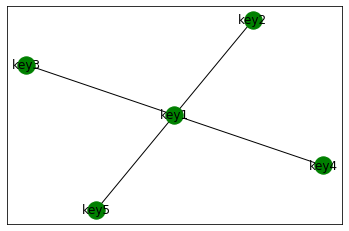

In [122]:
# 24.
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import shakespeare
%matplotlib inline

def hyponym_graph():
    G = nx.Graph()
    G.depth = {}
    return G

graph = hyponym_graph()
graph.add_edge("key1", "key2")
graph.add_edge("key1", "key3")
graph.add_edge("key1", "key4")
graph.add_edge("key1", "key5")
nx.draw_networkx(graph, node_color='g')
plt.show()

In [124]:
# 25. 
help(nltk.edit_distance)

Help on function edit_distance in module nltk.metrics.distance:

edit_distance(s1, s2, substitution_cost=1, transpositions=False)
    Calculate the Levenshtein edit-distance between two strings.
    The edit distance is the number of characters that need to be
    substituted, inserted, or deleted, to transform s1 into s2.  For
    example, transforming "rain" to "shine" requires three steps,
    consisting of two substitutions and one insertion:
    "rain" -> "sain" -> "shin" -> "shine".  These operations could have
    been done in other orders, but at least three steps are needed.
    
    Allows specifying the cost of substitution edits (e.g., "a" -> "b"),
    because sometimes it makes sense to assign greater penalties to
    substitutions.
    
    This also optionally allows transposition edits (e.g., "ab" -> "ba"),
    though this is disabled by default.
    
    :param s1, s2: The strings to be analysed
    :param transpositions: Whether to allow transposition edits
    :type 

In [125]:
nltk.edit_distance('pain', 'shine')

3

In [127]:
nltk.edit_distance

<function nltk.metrics.distance.edit_distance(s1, s2, substitution_cost=1, transpositions=False)>

In [148]:
# 26.

# a.
def catalon(n):
    if n == 0:
        return 1
    else:
        return sum(catalon(i) * catalon(n - i - 1) for i in range(0, n))

def catalon_recursive(n):
    for i in range(0, n):
        yield catalon(i)
        
list(catalon_recursive(10))

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

In [167]:
# b.
def dynamic_catalon(n, table):
    if n == 0:
        return 1
    else:
        total = 0
        for i in range(0, n):
            cat_i, cat_n_i = 0, 0
            try:
                cat_i = table[i]
            except KeyError:
                cat_i = dynamic_catalon(i, table)
                table[i] = cat_i
            
            try:
                cat_n_i = table[n - i - 1]
            except KeyError:
                cat_n_i = dynamic_catalon(n - i - 1, table)
                table[n - i - 1] = cat_n_i
                
            total += cat_i * cat_n_i
        return total

def dynamic_recursive(n):
    table = {}
    for i in range(0, n):
        yield dynamic_catalon(i, table)

In [168]:
list(dynamic_recursive(5))

[1, 1, 2, 5, 14]

In [180]:
# c
from timeit import Timer
t = Timer(lambda: catalon(10))
print(t.timeit(number=10))

t = Timer(lambda: dynamic_catalon(10, {}))
print(t.timeit(number=10))

0.2402197975635545
0.00015896168190465687


In [182]:
dynamic_catalon(6, {})

132

In [ ]:
# 27.


In [2]:
# 29

def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [3]:
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
insert(trie, 'vanguard', 'avantgarde')
trie = dict(trie)
trie['c']['h']['a']['t']['value']

'cat'

In [18]:
def pprint_trie(trie, line=''):
    if 'value' in trie:
        print(line + ':\'' + trie['value'] + '\'')
        return
    for index, key in enumerate(sorted(trie.keys())):
        if (index == 0):
            pprint_trie(trie[key], line + key)
        else:
            pprint_trie(trie[key], ('-' * len(line)) + key)
pprint_trie(trie)

chair:'flesh'
---t:'cat'
--ic:'stylish'
---en:'dog'
vanguard:'avantgarde'


In [9]:
trie

{'c': {'h': {'a': {'t': {'value': 'cat'}, 'i': {'r': {'value': 'flesh'}}},
   'i': {'e': {'n': {'value': 'dog'}}, 'c': {'value': 'stylish'}}}},
 'v': {'a': {'n': {'g': {'u': {'a': {'r': {'d': {'value': 'avantgarde'}}}}}}}}}